In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [7]:
Tc=0.1
Tp=1
W1=4
W2=2
#Beta=0.1

#beta circ
#Bc=Beta*np.sqrt(Tc/(np.pi*Tp))
Bc=0.01

'''
def bnm(n,m):
    return Bc*np.exp(-(((n-m)**2)+((Tc/Tp)**2)*((n+m)**2)+(2.0j)*(Tc**2)*(n+m)*(W1+W2))/4)
def beta(num):
    b=[]
    for i in range(-num,num):
        row=[]
        for k in range(-num,num):
            row.append(bnm(i,k))
        b.append(row)
        
    return b
'''

def rnm(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)

def beta(num):
    r=[]
    for i in range(-num,num):
        row=[]
        for k in range(-num,num):
            row.append(rnm(i,k))
        r.append(row)
        
    return Bc*np.array(r)

def sinh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sinh_Lambda = np.diag(np.sinh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sinh_A = V @ sinh_Lambda @ V_inv
    
    return sinh_A

#tanh of matrix A
def tanh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    tanh_Lambda = np.diag(np.tanh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    tanh_A = V @ tanh_Lambda @ V_inv
    
    return tanh_A

#sech of matrix A
def sech(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sech_Lambda = np.diag(1. / np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sech_A = V @ sech_Lambda @ V_inv
    
    return sech_A

#arctanh of matrix A
def arctanh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    arctanh_Lambda = np.diag(1. / np.arctanh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    arctanh_A = V @ arctanh_Lambda @ V_inv
    
    return arctanh_A
    

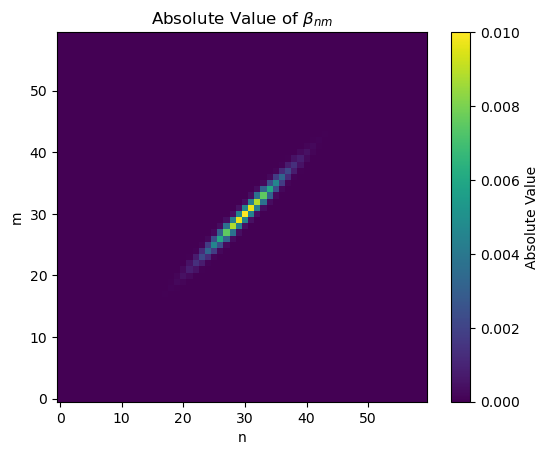

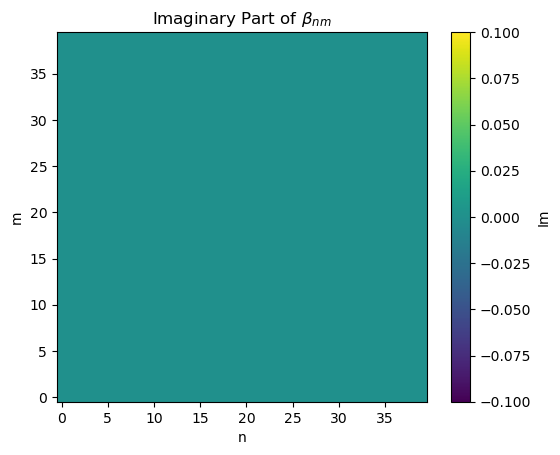

In [8]:
abs_matrix = np.abs(beta(30))

# Plot the matrix
plt.imshow(np.transpose(abs_matrix), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

matrix = np.imag(beta(20))

# Plot the matrix
plt.imshow(np.transpose(matrix), cmap='viridis', interpolation='none')
plt.colorbar(label='Im')
plt.title(r"Imaginary Part of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

In [9]:
B=beta(30)
U, Q = sc.linalg.polar(B, side = "left")

In [10]:
tanhQ = tanh(Q)
detW=np.linalg.det(sech(Q))
T=np.matmul(tanhQ,U)
Tdag=np.transpose(np.conjugate(T))
tanh2Q=np.dot(tanhQ,tanhQ)
print(np.linalg.det(tanhQ))

0.0


In [11]:
N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
print(N)
print(detW)
print(1-N/2)

0.0010036027980836089
0.9994982749755866
0.9994981986009582


In [38]:
#adjusted to include center frequency offset
def Dmat(dim, tau):
    Dmat=[] 
    for n in range(dim):
        row=[]
        for m in range(dim):
            row.append(np.exp((0+1j)*delta_omega*m)*np.sinc(tau+n-m))
        Dmat.append(row)
    return Dmat



def order1(Tmat,tau):
    dim=len(Tmat)
    D=Dmat(dim,tau)
    return detW**2/2 * (N-np.trace(np.linalg.multi_dot([Tdag, D, np.transpose(T), np.conjugate(D)])))


#old version which didn;t use matrix multiplication
def term2(Tmat,tau):
    l = len(Tmat)
    Tconj=np.conjugate(Tmat)
    sum = 0
    
    for i in range(l):
        for k in range(l):
            for n in range(l):
                for m in range(l):
                    sum += Tmat[n,m]*Tconj[i,k]*np.sinc(tau+i-m)*np.sinc(tau+n-k)
        
    return sum

def order2(Tmat,tau):
    dim=len(Tmat)
    D=Dmat(dim,tau)
    term2a = 2*N**2 + 2*np.trace(np.linalg.multi_dot([T,Tdag,T,Tdag]))
    matb = np.linalg.multi_dot([D,np.transpose(T),D,Tdag])
    term2b = 2*np.trace(matb)**2 + 2*np.trace(np.dot(matb,matb))
    term2c = np.trace(np.linalg.multi_dot([tanh2Q,np.transpose(D),np.transpose(D),tanh2Q]) + np.linalg.multi_dot([Tdag,T,Tdag,D,np.transpose(T),D]) + np.linalg.multi_dot([np.transpose(D),T,Tdag,T,np.transpose(D),np.conjugate(T)]))
    
    term2 = detW**2/16 * (18*term2a - 6*term2b -8*term2c)
    
    return term2
    

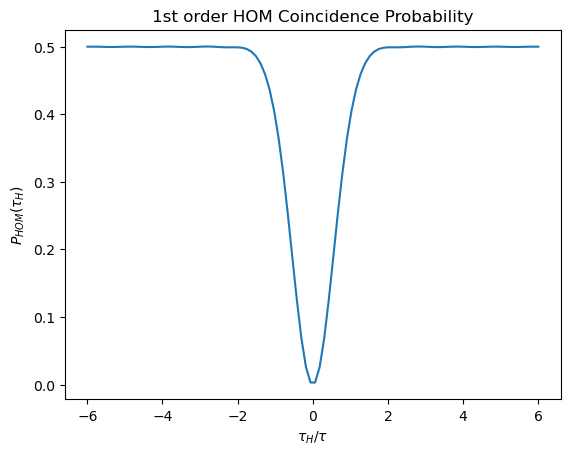

In [46]:
delta_omega = 0

tlist=np.linspace(-6,6,100)
plist1=[]
for t in tlist:
    plist1.append(np.real(order1(T,t)))
    
    
plt.plot(tlist,plist1/(detW**2 * N))
plt.xlabel(r"$\tau_H/\tau$")
plt.ylabel(r"$P_{HOM}(\tau_H)$")
plt.title("1st order HOM Coincidence Probability")
plt.show()

In [9]:
tlist=np.linspace(-10,10,100)
plist2=[]
for t in tlist:
    plist2.append(np.real(order2(T,t)))

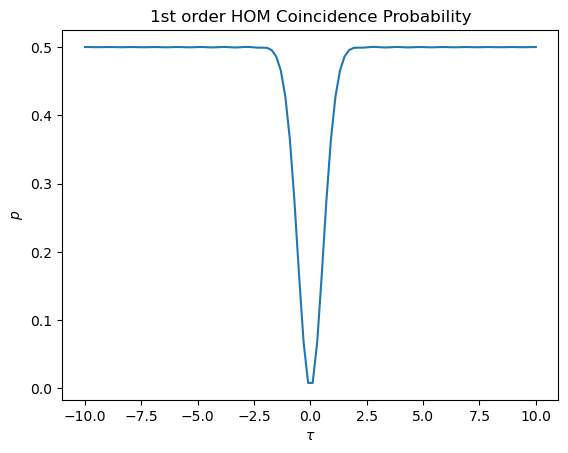

In [10]:

plt.plot(tlist,plist1/(detW**2 * N))
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p$")
plt.title("1st order HOM Coincidence Probability")
plt.show()

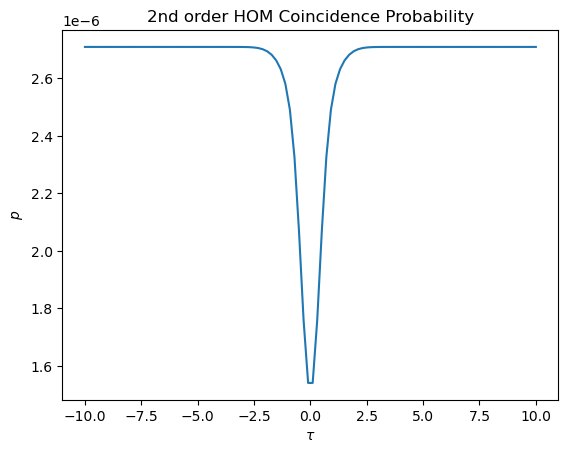

In [11]:
#plt.plot(tlist,plist2/(detW**2*(N**2+np.trace(np.linalg.multi_dot([T, Tdag, T, Tdag])))))
plt.plot(tlist,plist2)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p$")
plt.title("2nd order HOM Coincidence Probability")
plt.show()

In [12]:
#creating shifted beta matrix:

def beta_shifted(num,k):
    b=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm(n,m-k))
        b.append(row)
        
    return Bc*np.array(b)

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


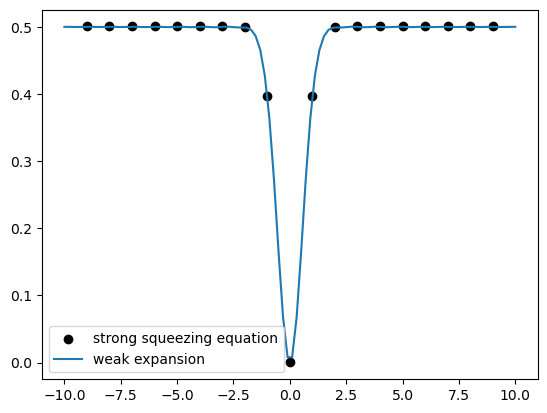

beta_circ =0.01


In [13]:
klist=range(-9,10)
Plist=[]
Bc=0.01

for k in klist:
    
    B=beta_shifted(100,k)
    
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    
    T = np.matmul(tanh(Q),U)
    
    L = 0.5*(T+np.transpose(T))
    
    LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
    N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
    Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
    Plist.append(Prob/(detW**2*N))
    
    '''
    abs_matrix = np.abs(B)
    plt.imshow(abs_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Absolute Value')
    plt.title(r"Absolute Value of $\beta_{nm}$")
    plt.xlabel('n')
    plt.ylabel('m')
    plt.gca().invert_yaxis()
    plt.show()
    '''


plt.scatter(klist,Plist,color="black", label="strong squeezing equation")
plt.plot(tlist,plist1/(detW**2*N), label="weak expansion")
plt.legend()
plt.show()
print('beta_circ ='+str(Bc))




0.09520374741809967
(0.049694497523508185+6.882871061936127e-16j)


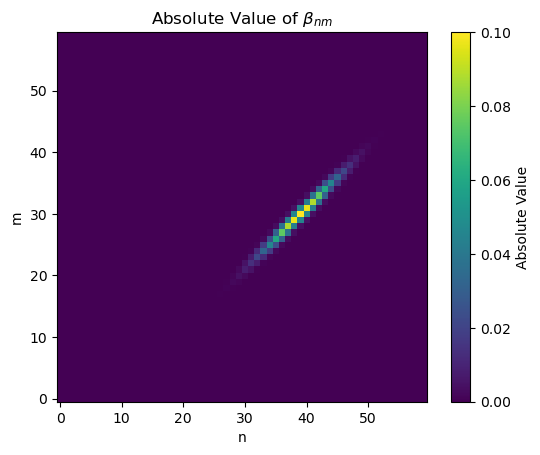

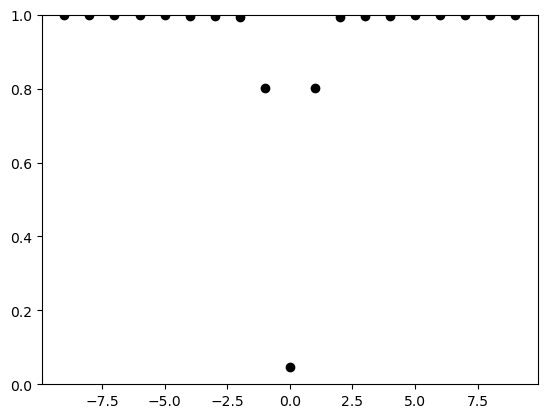

beta_circ =0.1


In [14]:
#high squeezing HOM dip for different beta values

Tc=0.1
Tp=1
#Beta=0.8

#beta circ
#Bc=Beta*np.sqrt(Tc/(np.pi*Tp))
Bc = 0.1
fine_param = 1
mat_size = 30 * fine_param

def rnm(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)


def beta_shifted_fine(num,k,f):
    b=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm(n/f,(m-k)/f))
        b.append(row)
        
    return Bc / f *np.array(b)


klist=range(-9 * fine_param, 10 * fine_param)
#klist = range(-9, 10)

Plist=[]

for k in klist:
    
    B=beta_shifted_fine(mat_size,k,fine_param)
    
    U, Q = sc.linalg.polar(B, side = "left")
    detW = np.linalg.det(sech(Q))
    
    T = np.matmul(tanh(Q),U)
    
    L = 0.5*(T+np.transpose(T))
    
    LdagL=np.dot(np.transpose(np.conjugate(L)),L)
    
    
    N=np.trace(np.matmul(T,np.transpose(np.conjugate(T))))
    
    Prob = 1+(detW**2)*(1-2/np.sqrt(np.linalg.det(np.identity(len(L))-LdagL)))
    Plist.append(Prob)
    
    '''
    abs_matrix = np.abs(B)
    plt.imshow(abs_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Absolute Value')
    plt.title(r"Absolute Value of $\beta_{nm}$")
    plt.xlabel('n')
    plt.ylabel('m')
    plt.gca().invert_yaxis()
    plt.show()
    '''
    
    
#finding normalization using far time
norm=Plist[0]
detW=np.linalg.det(sech(Q))
print(1-detW**2)
print(norm)

#norm = 1 - detW**2

# Plot the matrix
plt.imshow(np.abs(B), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()


plt.scatter(klist,Plist,color="black")
plt.ylim(bottom = 0, top = 1)
plt.show()
print('beta_circ ='+str(Bc))

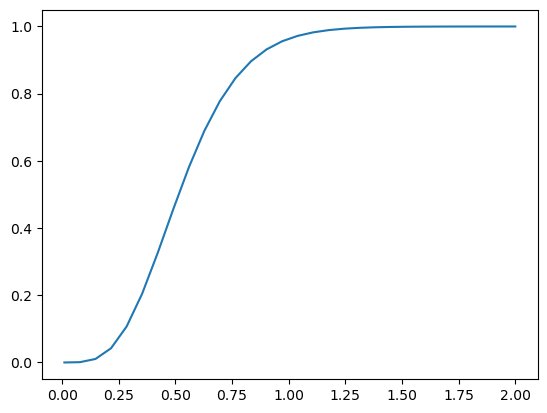

In [15]:
#plot minimum as function of Bc

Bc_vals = np.linspace(0.01, 2, 30)
Pmin_data = []
approx_data = []

Bc = 1

B = beta(30)
U, Q = sc.linalg.polar(B, side = "left")

    
def approx_Pmin(bc):
    N = np.trace(np.matmul(sinh(bc * Q),sinh(bc * Q)))
    return N**2 / 8
    
for bc in Bc_vals:
    detW = np.linalg.det(sech(bc * Q))
    Pmin_data.append((1 - detW)**2)
    
    approx_data.append(approx_Pmin(bc))

    
plt.plot(Bc_vals,Pmin_data)
#plt.plot(Bc_vals, approx_data)

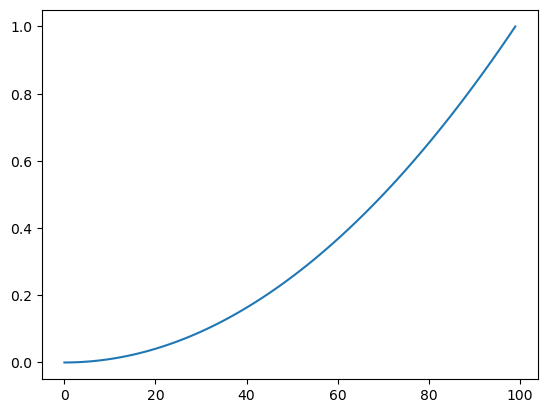

In [16]:
plt.plot(np.linspace(0,1,100)**2)
